In [1]:
from torch import load
import numpy as np
import sys

sys.path.append('..')

In [2]:
# If you haven't trained a model yet, please go to the file 'baryons_train.ipynb' first!
model = load('../models/baryon_model_200gev.pt')
model.eval()

BaryonModel(
  (linear_in): Linear(in_features=141, out_features=256, bias=False)
  (linear_1): Linear(in_features=256, out_features=256, bias=False)
  (linear_2): Linear(in_features=256, out_features=141, bias=False)
  (leaky): LeakyReLU(negative_slope=0.01)
)

In [3]:
from hydroml.dataset import TrainDataset
from torch.utils.data import DataLoader

net_Baryons_19 = np.fromfile('../datasets/training/3DAuAu200_minimumbias_BG16_tune17_netBaryon.dat', dtype=np.float32)
net_Protons_19 = np.fromfile('../datasets/training/3DAuAu200_minimumbias_BG16_tune17_netProton.dat', dtype=np.float32)

dataset_19 = TrainDataset(net_Baryons_19, net_Protons_19, 141)

dataset = dataset_19

data_loader = DataLoader(
    dataset=dataset,
    batch_size=1,
    shuffle=True,
)

2048


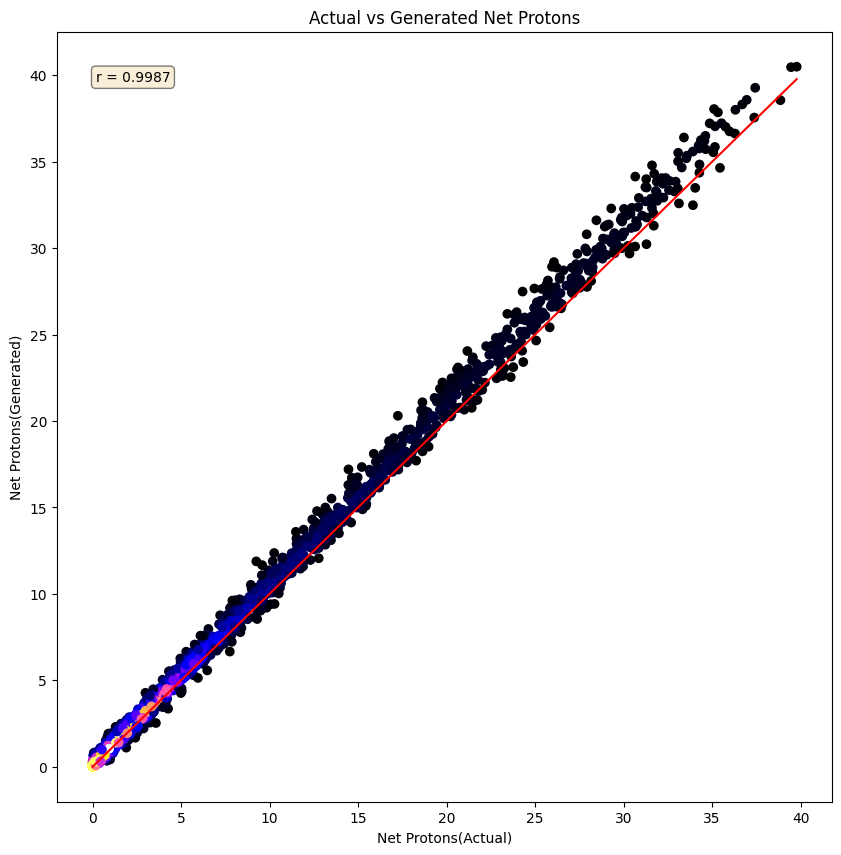

In [8]:
from hydroml.plot import plot_cc_graph, plot_output_compare, plot_output
from hydroml.moments import Moments
from hydroml.trim import trim

finals = []
models = []
bound_1 = -2
bound_2 = 2

import numpy as np

print(len(data_loader))

for i, data in enumerate(data_loader):
    key = data[0]
    value = data[1].flatten()

    protons_model = model(key)

    protons_model = protons_model.detach().numpy().flatten()

    eta_trim, protons_trim = trim( dataset.eta, value, bound_1, bound_2  )
    _, protons_model_trim = trim( dataset.eta, protons_model, bound_1, bound_2  )

    finals.append( np.trapz( protons_trim, x=eta_trim ) )
    models.append( np.trapz( protons_model_trim, x=eta_trim ) )

finals_moments = Moments(finals)
models_moments = Moments(models)

# print("Values for actual final state")
# print(finals_moments)
# print("\n")
# print("Values for model output final state")
# print(models_moments)

plot_cc_graph(np.array(finals), np.array(models), "Net Protons")